In [1]:
import os
import matplotlib.pyplot as plt
from openghg.localclient import get_obs_surface
from openghg.modules import Emissions, FOOTPRINTS, ObsSurface
from openghg.processing import footprints_data_merge, search, recombine_datasets

# object_store = "/work/<username>/object_store"

import tempfile
tmp_dir = tempfile.TemporaryDirectory()
object_store = tmp_dir.name # "/tmp/openghg_store"

os.environ["OPENGHG_PATH"] = object_store

/work/rt17603/environments/openghg/lib/python3.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
site="tac" 
network="DECC"
height="100m"
domain="EUROPE"
species="ch4"

In [3]:
obs_file = "../data/DECC/tac.picarro.1minute.100m.test.dat"

ObsSurface.read_file(filepath=obs_file, data_type="CRDS", site=site, network=network, inlet=height)

Processing: tac.picarro.1minute.100m.test.dat: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


defaultdict(dict,
            {'processed': {'tac.picarro.1minute.100m.test.dat': {'ch4': '9d3bc89a-b0a1-44ef-8158-791bc9dc4cdc',
               'co2': 'b1bed876-d152-4fa4-b6e0-a33e8c604c5d'}}})

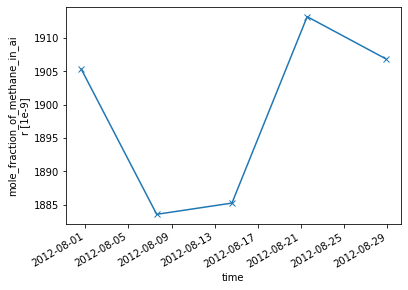

In [4]:
start_date = "2012-08-01"
end_date = "2012-09-01"

obs = get_obs_surface(site=site, species=species, start_date=start_date,
                        end_date=end_date, inlet=height, network=network)

mf = obs.data["mf"]
mf.plot(marker="x")

In [5]:
fp_file_path = "../data/footprints/TAC-100magl_EUROPE_201208.nc"

site="tac" 
height="100m"
domain="EUROPE"
model="NAME"

FOOTPRINTS.read_file(filepath=fp_file_path, site=site, height=height, domain=domain, model=model)

{'tac_europe_NAME_100m': 'b41ed90c-4047-421d-b02f-4564fbf7f944'}

In [6]:
flux_file_path = "../data/emissions/ch4-anthro_EUROPE_2012.nc"

species = "ch4"
domain = "EUROPE"
source = "anthro"
date = "2012"

Emissions.read_file(filepath=flux_file_path, species=species, source=source, domain=domain, date=date)

{'ch4_anthro_europe_2012': '0ec7cd91-4797-462f-a4d4-c146be7c85a2'}

In [8]:
# Use get_obs_surface to extract obs results from the object store
obs_surface = get_obs_surface(
    site=site, inlet=height, start_date=start_date, end_date=end_date, species=species)
obs_results = obs_surface.data

In [9]:
# Extract footprint results from the object store
# TODO: This should be wrapped up into a function really
all_footprint_results = search(site=site, domain=domain, height=height, start_date=start_date, end_date=end_date, data_type="footprint")
uuid = list(all_footprint_results.keys())[0]
footprint_keys = all_footprint_results[uuid]["keys"]

footprint_results = recombine_datasets(keys=footprint_keys, sort=False) # Need this output to match to what we get from get_obs_surface e.g. get_footprint equivalent

In [10]:
from openghg.modules import ModelScenario

model = ModelScenario(obs=obs_results, footprint=footprint_results)

In [11]:
model.combine_obs_footprint(resample_to="coarsest")

resample_to coarsest


<xarray.Dataset>
Dimensions:                    (height: 20, lat: 293, lev: 1, lon: 391, time: 4)
Coordinates:
  * time                       (time) datetime64[ns] 2012-08-07T14:50:30 ... ...
  * lon                        (lon) float32 -97.9 -97.55 -97.2 ... 39.03 39.38
  * lat                        (lat) float32 10.73 10.96 11.2 ... 78.82 79.06
  * lev                        (lev) object 'From     0 -    40m agl'
  * height                     (height) float32 500.0 1.5e+03 ... 1.95e+04
Data variables: (12/15)
    mf                         (time) float64 1.884e+03 1.885e+03 ... 1.907e+03
    mf_variability             (time) float64 0.694 0.179 0.67 0.276
    mf_number_of_observations  (time) float64 20.0 20.0 20.0 20.0
    fp                         (lat, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    temperature                (time) float32 15.73 17.13 20.44 15.96
    pressure                   (time) float32 992.7 1.001e+03 996.6 992.5
    ...                         ...
    release_lon                (time) float32 1.139 1.139 1.139 1.139
    release_lat                (time) float32 52.52 52.52 52.52 52.52
    particle_locations_n       (height, lon, time) float32 2.305e-05 ... 0.0
    particle_locations_e       (height, lat, time) float32 0.0 0.0 ... 0.0 0.0
    particle_locations_s       (height, lon, time) float32 0.0 0.0 ... 0.0 0.0
    particle_locations_w       (height, lat, time) float32 0.0 0.0 ... 0.0 0.0
Attributes: (12/22)
    data_owner:           Simon O'Doherty
    data_owner_email:     s.odoherty@bristol.ac.uk
    inlet_height_magl:    100m
    comment:              Cavity ring-down measurements. Output from GCWerks
    Conditions of use:    Ensure that you contact the data owner at the outse...
    Source:               In situ measurements of air
    ...                   ...
    sampling_period:      60
    inlet:                100m
    port:                 9
    type:                 air
    network:              decc
    scale:                WMO-X2004A

In [12]:
from openghg.processing._process_footprint import get_flux

species = "ch4"
domain = "EUROPE"
source = "anthro"
start_date = "2012-01-01"
end_date = "2013-01-01"

# Extract flux results from object store
# TODO: Decide if this should return a Emissions type object (as get_obs_surface does) or an xarray Dataset directly (as this does at the moment)
flux_results = get_flux(species=species,
                        domain=domain,
                        sources=source,
                        start_date=start_date,
                        end_date=end_date)

In [13]:
# Add flux results
model.flux = flux_results

In [14]:
# TODO: Want to calculate the modelled mole fraction using `model` when this has been written into the code